<a href="https://colab.research.google.com/github/DAUN3046/news_wordcloud/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/news.xlsx', header=None)

In [ ]:
df.head()

,0
0,"""애플페이 언제 쓸 수 있어요?""···시행일 지나도 애플·현대카드 '묵묵부답'-비즈팩트"
1,‘카카오 먹통 재발 방지법’ 국회 상임위 통과… 중소기업 피해 우려도-조선비즈
2,얼어붙은 NFT 시장...멀티체인·인터체인 NFT로 활로 뚫을까-디지털투데이
3,은행 점포 올해만 206곳 폐쇄-디지털타임스
4,"네이버, 금융 마이데이터 첫 적용...MY플레이스와 페이 내 자산 연동-IT조선"


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df[0][1]

'‘카카오 먹통 재발 방지법’ 국회 상임위 통과… 중소기업 피해 우려도-조선비즈'

In [ ]:
df

,0
0,"""애플페이 언제 쓸 수 있어요?""···시행일 지나도 애플·현대카드 '묵묵부답'-비즈팩트"
1,‘카카오 먹통 재발 방지법’ 국회 상임위 통과… 중소기업 피해 우려도-조선비즈
2,얼어붙은 NFT 시장...멀티체인·인터체인 NFT로 활로 뚫을까-디지털투데이
3,은행 점포 올해만 206곳 폐쇄-디지털타임스
4,"네이버, 금융 마이데이터 첫 적용...MY플레이스와 페이 내 자산 연동-IT조선"
...,...
166,"""AI·ML 실사용 가속화"" 델 테크놀로지스, 2023년 주요 IT 전망 발표-테크엠"
167,NaN
168,"토스·케이뱅크, 파킹통장으로 ‘금리경쟁’ 불 지피나-뉴스저널리즘"
169,NaN


In [ ]:
df = df.dropna(axis=0)
df

,0
0,"""애플페이 언제 쓸 수 있어요?""···시행일 지나도 애플·현대카드 '묵묵부답'-비즈팩트"
1,‘카카오 먹통 재발 방지법’ 국회 상임위 통과… 중소기업 피해 우려도-조선비즈
2,얼어붙은 NFT 시장...멀티체인·인터체인 NFT로 활로 뚫을까-디지털투데이
3,은행 점포 올해만 206곳 폐쇄-디지털타임스
4,"네이버, 금융 마이데이터 첫 적용...MY플레이스와 페이 내 자산 연동-IT조선"
...,...
163,"ESG 대전환, 덫이 아닌 기회로 만들어야-경향신문"
164,"인터넷은행 3사 생존법 ""고객기반 넓혀라""…비은행서비스 강화 총력-뉴스웍스"
166,"""AI·ML 실사용 가속화"" 델 테크놀로지스, 2023년 주요 IT 전망 발표-테크엠"
168,"토스·케이뱅크, 파킹통장으로 ‘금리경쟁’ 불 지피나-뉴스저널리즘"


In [ ]:
df[0][3]

'은행 점포 올해만 206곳 폐쇄-디지털타임스'

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df2 = pd.DataFrame()

In [ ]:
for i in range(len(df)):
  df[0][i] = df[0][i].split('-')[0]

In [ ]:
df.head()

,0
0,"""애플페이 언제 쓸 수 있어요?""···시행일 지나도 애플·현대카드 '묵묵부답'"
1,‘카카오 먹통 재발 방지법’ 국회 상임위 통과… 중소기업 피해 우려도
2,얼어붙은 NFT 시장...멀티체인·인터체인 NFT로 활로 뚫을까
3,은행 점포 올해만 206곳 폐쇄
4,"네이버, 금융 마이데이터 첫 적용...MY플레이스와 페이 내 자산 연동"


# 형태소 분리
konlpy 설치

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 2s (113 kB/s)
Reading package lis

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp38-cp38-linux_x86_64.whl size=142145 sha256=477fed156139b14178696c6b8b117cf1b863632f35a54be8be4f1f296a133651
  Stored in directory: /root/.cache/pip/wheels/e3/88/e7/a947778cce3c142d5721c0629e05db7b09979d3a973277ec2f
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [ ]:
text = list()

In [ ]:
okt = Okt()
for i in range(len(df)):
  text += okt.nouns(df[0][i])
# print(text[0:99])


# 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

In [27]:
counts = Counter(text)
tags = counts.most_common(100)

한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

In [28]:
wc = WordCloud(background_color='white', font_path = 'NanumBarunGothic', )
cloud = wc.generate_from_frequencies(dict(tags))

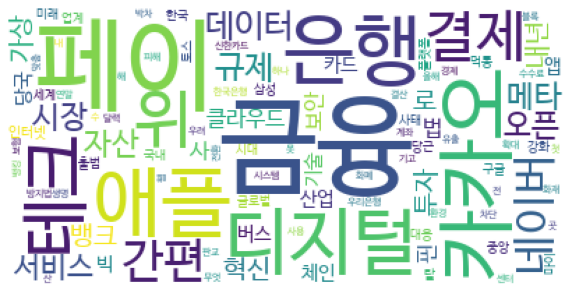

In [29]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
cloud.to_file('result.jpg')